# Examen de Certificación – Intento 2

##  Fundamentos de Data Science
Analizando la Satisfacción de Clientes en la Industria Hotelera

### Requisitos:

Tu tarea es limpiar y explorar un dataset que contiene información sobre la satisfacción de los clientes en la industria hotelera. Este análisis es crucial para los ejecutivos de la empresa que buscan entender mejor las opiniones y experiencias de sus clientes para mejorar los servicios ofrecidos.

El dataset puede ser encontrado aquí.

### Limpieza de datos con Python:
* Detección y eliminación de valores duplicados: Asegúrate de que cada registro en el dataset sea único.
* Verificación y ajuste de tipos de datos: Asegúrate de que todas las columnas coincidan con los tipos de datos indicados en el diccionario de datos.
* Consistencia en valores categóricos: Identifica y corrige cualquier inconsistencia en los valores categóricos (por ejemplo, ‘yes’, ‘Yes’, ‘YES’).
* Manejo de valores faltantes: Identifica y maneja cualquier valor faltante en el dataset. Rellena los valores faltantes con un marcador adecuado para el tipo de dato.
* Detección de datos anómalos: Identifica y corrige cualquier punto de dato inapropiado o inusual (por ejemplo, una estancia de 1000 noches).
### Exploración de datos con Python:
* Visualizaciones exploratorias univariadas: Crea dos tipos diferentes de visualizaciones univariadas. Cada visualización debe incluir una breve interpretación dentro del archivo de código.
* Visualizaciones exploratorias multivariadas: Crea dos tipos diferentes de visualizaciones multivariadas. Cada visualización debe incluir una breve interpretación dentro del archivo de código.
### Análisis adicional:
* Estadísticas descriptivas: Proporciona un resumen estadístico del dataset, incluyendo medidas de tendencia central y dispersión para las variables numéricas.
* Identificación de tendencias: Analiza y discute cualquier tendencia notable que observes en los datos, apoyándote en las visualizaciones y estadísticas descriptivas.

### Importacion de librerias y carga de dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../Data/hotel_bookings.csv', sep=',', header=0)

### Primeras impresiones

In [3]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [4]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [5]:
qsna=df.shape[0]-df.isnull().sum(axis=0)
qna=df.isnull().sum(axis=0)
ppna=round(100*(df.isnull().sum(axis=0)/df.shape[0]),2)
aux= {'datos sin NAs en q': qsna, 'Na en q': qna ,'Na en %': ppna}
na=pd.DataFrame(data=aux)
na.sort_values(by='Na en %',ascending=False)

,datos sin NAs en q,Na en q,Na en %
company,6797,112593,94.31
agent,103050,16340,13.69
country,118902,488,0.41
hotel,119390,0,0.00
previous_cancellations,119390,0,0.00
reservation_status,119390,0,0.00
total_of_special_requests,119390,0,0.00
required_car_parking_spaces,119390,0,0.00
adr,119390,0,0.00
customer_type,119390,0,0.00


### Verificación y ajuste de tipos de datos:
Convertimos a los dtypes correspondientes

In [6]:
df['hotel'] = df['hotel'].astype('object')
df['is_canceled'] = df['is_canceled'].astype('int64')
df['lead_time'] = df['lead_time'].astype('int64')
df['arrival_date_year'] = df['arrival_date_year'].astype('int64')
df['arrival_date_month'] = df['arrival_date_month'].astype('object')
df['arrival_date_week_number'] = df['arrival_date_week_number'].astype('int64')
df['arrival_date_day_of_month'] = df['arrival_date_day_of_month'].astype('int64')
df['stays_in_weekend_nights'] = df['stays_in_weekend_nights'].astype('int64')
df['stays_in_week_nights'] = df['stays_in_week_nights'].astype('int64')
df['adults'] = df['adults'].astype('int64')
df['children'] = df['children'].astype('float64')
df['babies'] = df['babies'].astype('int64')
df['meal'] = df['meal'].astype('object')
df['country'] = df['country'].astype('object')
df['market_segment'] = df['market_segment'].astype('object')
df['distribution_channel'] = df['distribution_channel'].astype('object')
df['is_repeated_guest'] = df['is_repeated_guest'].astype('int64')
df['previous_cancellations'] = df['previous_cancellations'].astype('int64')
df['previous_bookings_not_canceled'] = df['previous_bookings_not_canceled'].astype('int64')
df['reserved_room_type'] = df['reserved_room_type'].astype('object')
df['assigned_room_type'] = df['assigned_room_type'].astype('object')
df['booking_changes'] = df['booking_changes'].astype('int64')
df['deposit_type'] = df['deposit_type'].astype('object')
df['agent'] = df['agent'].astype('float64')
df['company'] = df['company'].astype('float64')
df['days_in_waiting_list'] = df['days_in_waiting_list'].astype('int64')
df['customer_type'] = df['customer_type'].astype('object')
df['adr'] = df['adr'].astype('float64')
df['required_car_parking_spaces'] = df['required_car_parking_spaces'].astype('int64')
df['total_of_special_requests'] = df['total_of_special_requests'].astype('int64')
df['reservation_status'] = df['reservation_status'].astype('object')
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])

### Limpieza de datos

Eliminamos la columnas innecesarias

In [7]:
df.drop(columns=['company', 'agent'], inplace=True) #Eliminamos la columna company y agent porque tienen muchos valores nulos

Detección y eliminación de valores duplicados:

In [8]:
df.drop_duplicates(inplace=True) # Eliminamos los duplicados

Ordenamos los meses para no tener problemas en las visualizaciones

In [9]:
orden_meses = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']

df['arrival_date_month'] = pd.Categorical(df['arrival_date_month'], categories=orden_meses, ordered=True)

### Agrupaciones y visualizaciones varias

In [10]:
# Ocupación y cancelaciones por hotel y mes
df.groupby(['hotel', 'arrival_date_month'])[['is_canceled', 'adr']].agg({
    'is_canceled': 'mean',  # Tasa de cancelación
    'adr': ['mean', 'count']  # Precio medio y número de reservas
})

C:\Users\guill\AppData\Local\Temp\ipykernel_7488\3649167429.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['hotel', 'arrival_date_month'])[['is_canceled', 'adr']].agg({


is_canceled         adr      
                                       mean        mean count
hotel        arrival_date_month                              
City Hotel   January               0.279853   85.092612  2730
             February              0.270533   88.948063  3604
             March                 0.281211   94.772260  4854
             April                 0.344624  117.158596  5078
             May                   0.322676  127.848625  5411
             June                  0.303757  123.841845  5004
             July                  0.330604  120.056964  5741
             August                0.320030  124.908399  6590
             September             0.251770  118.557973  4238
             October               0.267823  107.304166  4208
             November              0.253569   89.454120  2942
             December              0.325149   92.717339  3014
Resort Hotel January               0.139725   49.146507  1961
             February              0.176636   54.091208  2491
             March                 0.175009   57.569213  2657
             April                 0.233027   79.283805  2828
             May                   0.236574   80.551101  2942
             June                  0.301812  112.340141  2760
             July                  0.301484  156.159300  4312
             August                0.324185  187.590058  4664
             September             0.234694  100.892331  2450
             October               0.188921   63.676313  2726
             November              0.149756   48.839517  2050
             December              0.188180   65.426501  2115

C:\Users\guill\AppData\Local\Temp\ipykernel_7488\3749912612.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_grouped = df.groupby(['hotel', 'arrival_date_month'])[['is_canceled', 'adr']].agg({


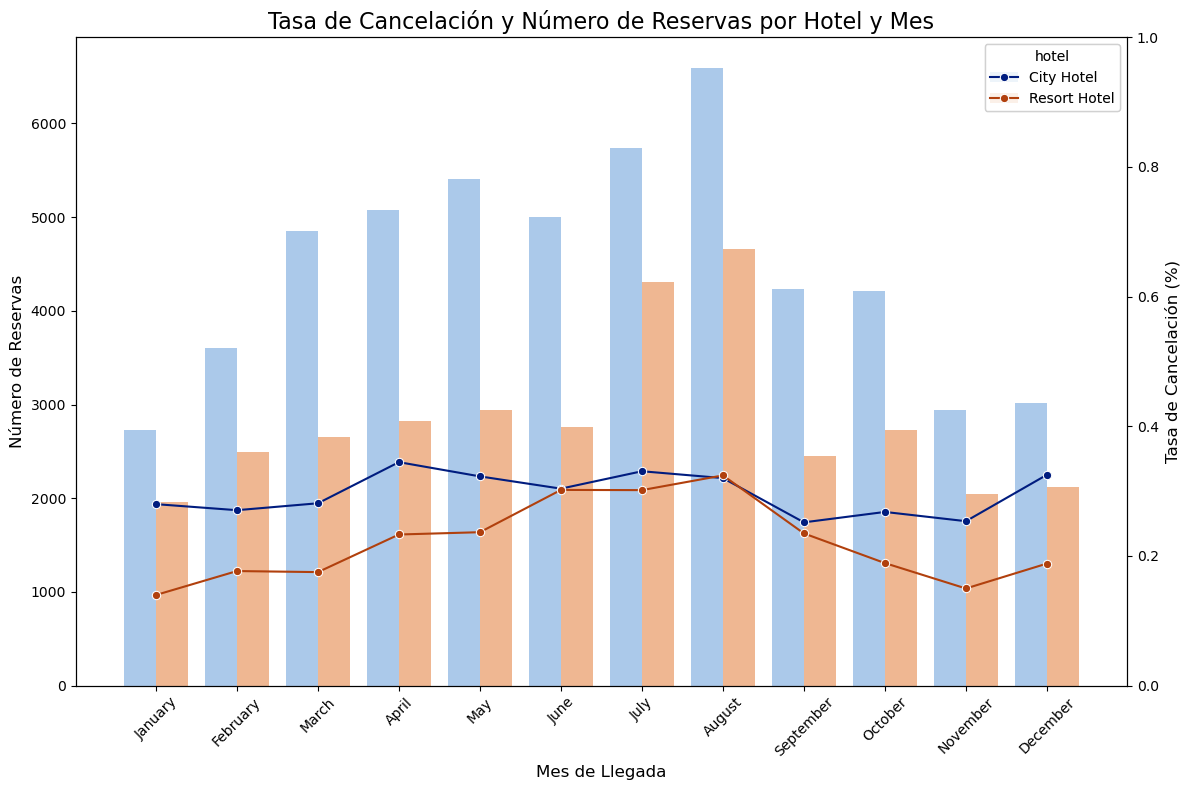

In [11]:
#Code de agrupacion proporcionado por Claude y ajuste de visualizacion con GPT

# Agrupar por hotel y mes, calculando la tasa de cancelación, precio medio (adr) y número de reservas
df_grouped = df.groupby(['hotel', 'arrival_date_month'])[['is_canceled', 'adr']].agg({
    'is_canceled': 'mean',  # Tasa de cancelación
    'adr': ['mean', 'count']  # Precio medio y número de reservas
}).reset_index()

# Renombrar columnas para facilitar el acceso
df_grouped.columns = ['hotel', 'arrival_date_month', 'cancel_rate', 'adr_mean', 'num_reservations']

# Crear figura y ejes para subplots
fig, ax1 = plt.subplots(figsize=(12, 8))

# Trazar el número de reservas (como barras apiladas por hotel y mes)
sns.barplot(x='arrival_date_month', y='num_reservations', hue='hotel', data=df_grouped, ax=ax1, palette='pastel')
ax1.set_xlabel('Mes de Llegada', fontsize=12)
ax1.set_ylabel('Número de Reservas', fontsize=12)
ax1.tick_params(axis='x', rotation=45)

# Crear un segundo eje y para la tasa de cancelación
ax2 = ax1.twinx()
sns.lineplot(x='arrival_date_month', y='cancel_rate', hue='hotel', data=df_grouped, ax=ax2, marker="o", palette='dark')
ax2.set_ylabel('Tasa de Cancelación (%)', fontsize=12)
ax2.set_ylim(0, 1)  # Tasa de cancelación entre 0 y 1 (0% a 100%)


plt.title('Tasa de Cancelación y Número de Reservas por Hotel y Mes', fontsize=16)
plt.tight_layout()
plt.show()

Se observa que el ratio de cancelacion es mas alto en los hoteles de ciudad

In [12]:
df_grouped1 = df.groupby(['customer_type', 'market_segment'])[['adr', 'total_of_special_requests', 'stays_in_weekend_nights', 'stays_in_week_nights']].agg({
    'adr': 'mean',
    'total_of_special_requests': 'mean',
    'stays_in_weekend_nights': 'sum',
    'stays_in_week_nights': 'sum'
}).reset_index()

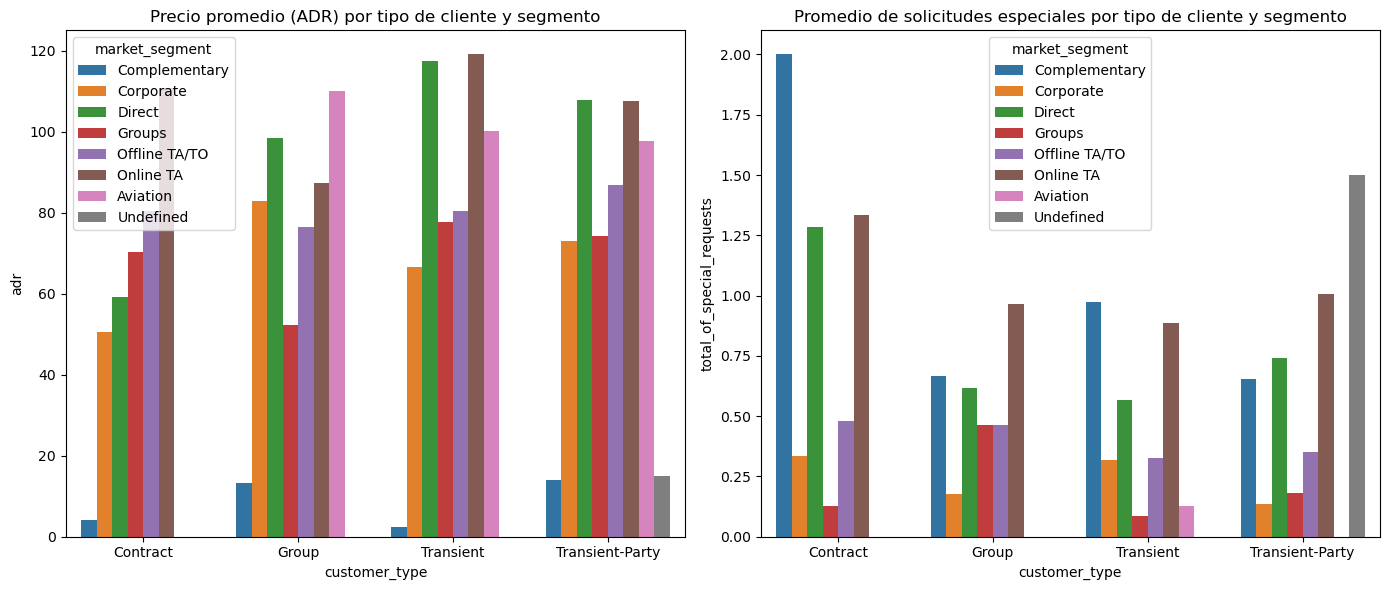

In [13]:


fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Gráfico 1: ADR (precio promedio por tipo de cliente y segmento de mercado)
sns.barplot(data=df_grouped1, x='customer_type', y='adr', hue='market_segment', ax=ax[0])
ax[0].set_title('Precio promedio (ADR) por tipo de cliente y segmento')

# Gráfico 2: Total de solicitudes especiales
sns.barplot(data=df_grouped1, x='customer_type', y='total_of_special_requests', hue='market_segment', ax=ax[1])
ax[1].set_title('Promedio de solicitudes especiales por tipo de cliente y segmento')

plt.tight_layout()
plt.show()

In [14]:
# Agrupar los datos para calcular la tasa de cancelación
df_grouped2 = df.groupby(['deposit_type', 'market_segment'])['is_canceled'].mean().reset_index()

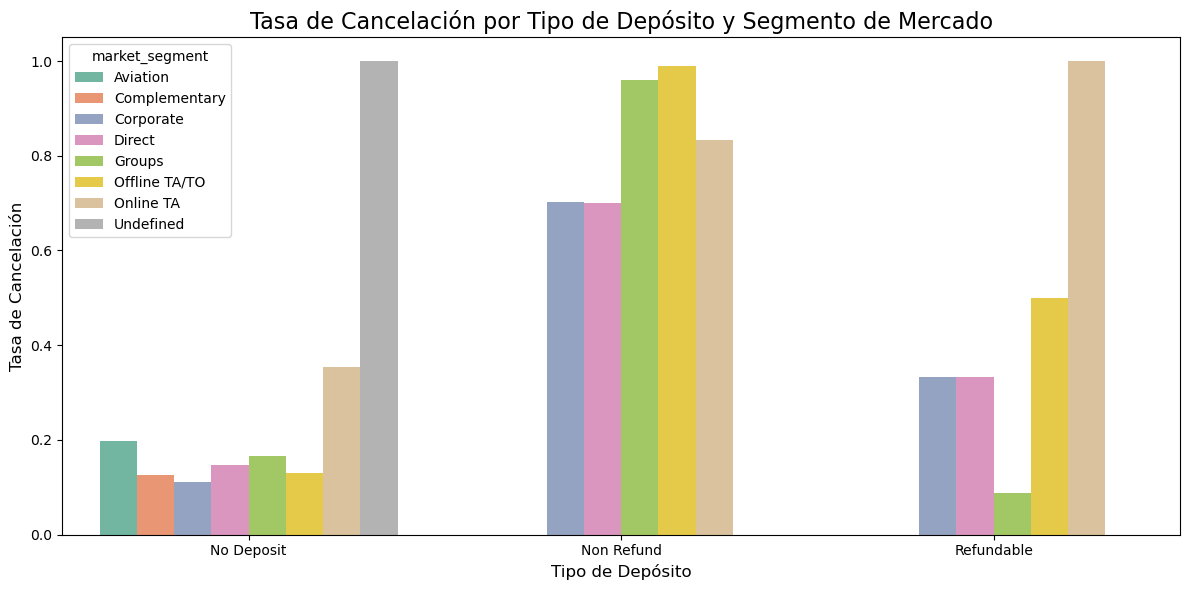

In [15]:
plt.figure(figsize=(12, 6))
sns.barplot(x='deposit_type', y='is_canceled', hue='market_segment', data=df_grouped2, palette='Set2')

plt.title('Tasa de Cancelación por Tipo de Depósito y Segmento de Mercado', fontsize=16)
plt.xlabel('Tipo de Depósito', fontsize=12)
plt.ylabel('Tasa de Cancelación', fontsize=12)

plt.tight_layout()
plt.show()


### Tratamiento Valores Anomalos

Eliminamos valores nulos en la columna adult

In [16]:
df = df[(df['adults'] <= 5) & (df['adults'] != 0)]


<Axes: xlabel='adults'>

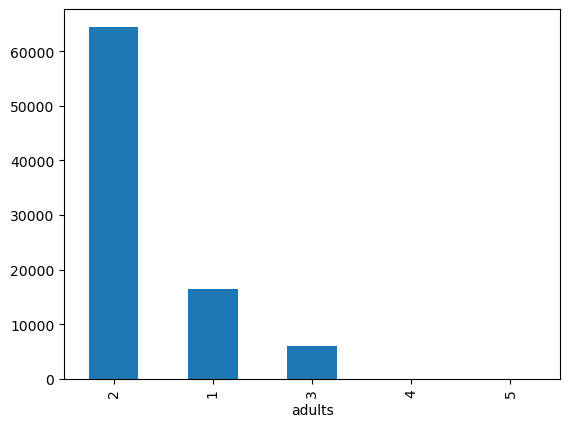

In [17]:
df['adults'].value_counts().plot(kind='bar')

C:\Users\guill\AppData\Local\Temp\ipykernel_7488\2012982698.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([df['arrival_date_week_number'], df['arrival_date_day_of_month'],


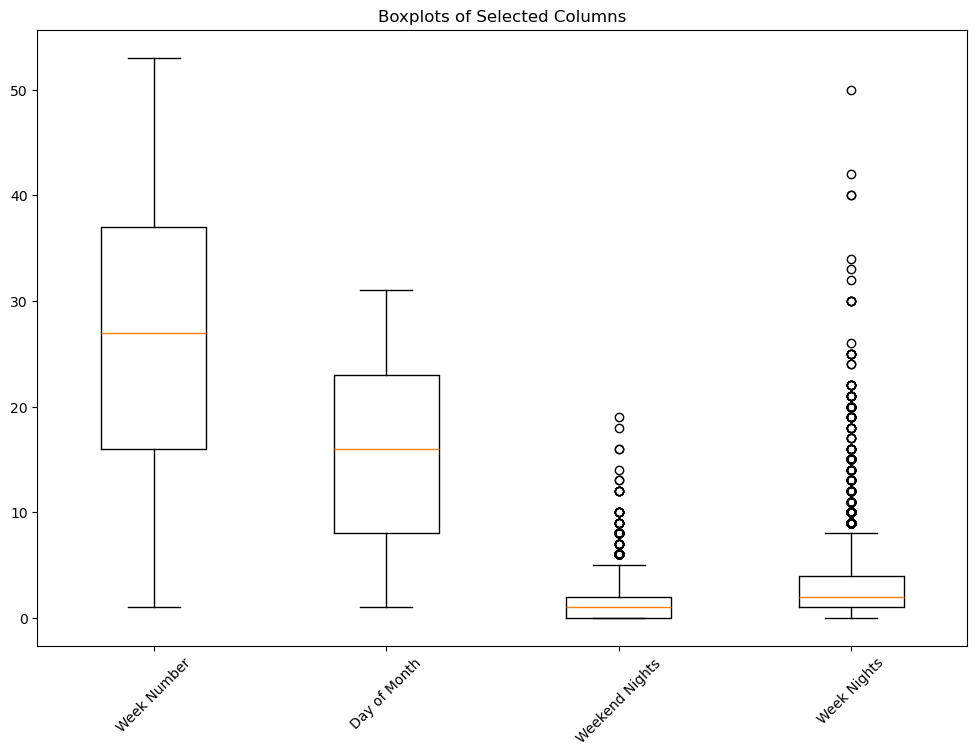

<Axes: xlabel='adults'>

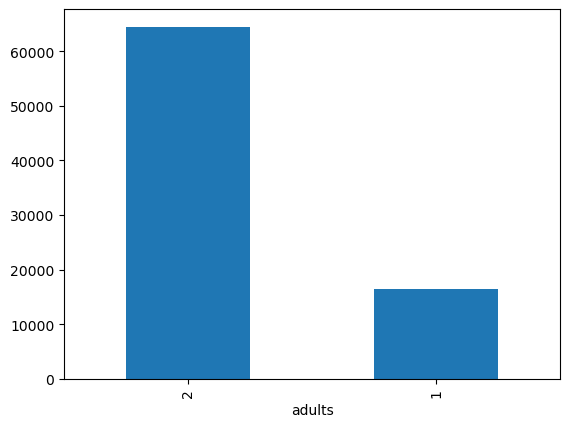

In [18]:
### Identificacion de valores anomalos
plt.figure(figsize=(12, 8))
plt.boxplot([df['arrival_date_week_number'], df['arrival_date_day_of_month'], 
             df['stays_in_weekend_nights'], df['stays_in_week_nights']], 
            labels=['Week Number', 'Day of Month', 'Weekend Nights', 'Week Nights'])
plt.xticks(rotation=45)
plt.title('Boxplots of Selected Columns')
plt.show()
q = df["adults"].quantile(0.995)
df_adult_filter = df[df["adults"] < q]
df_adult_filter['adults'].value_counts().plot(kind='bar')


Verificamos los outliers en algunas columnas importantes

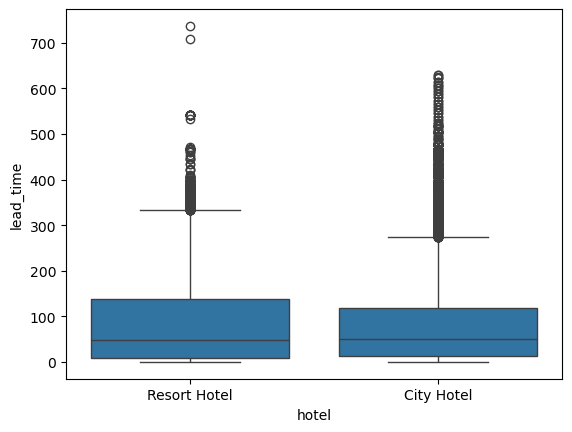

In [19]:
plt.figure()
sns.boxplot(x='hotel', y='lead_time', data=df)
plt.show()

C:\Users\guill\AppData\Local\Temp\ipykernel_7488\4118312096.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(grouped_hotel['lead_time'], labels=grouped_hotel['hotel'])


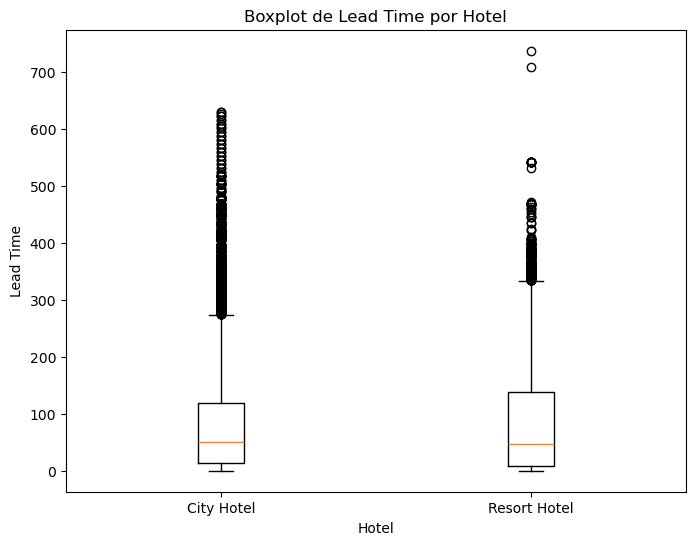

In [20]:
# Agrupar por hotel y calcular estadísticas de lead time
grouped_hotel = df.groupby('hotel')['lead_time'].apply(list).reset_index()

# Crear el boxplot para 'lead_time' agrupado por 'hotel'
plt.figure(figsize=(8,6))
plt.boxplot(grouped_hotel['lead_time'], labels=grouped_hotel['hotel'])
plt.title('Boxplot de Lead Time por Hotel')
plt.xlabel('Hotel')
plt.ylabel('Lead Time')
plt.show()


C:\Users\guill\AppData\Local\Temp\ipykernel_7488\3572790495.py:13: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_no_outliers = df.groupby('hotel').apply(remove_outliers).reset_index(drop=True)
C:\Users\guill\AppData\Local\Temp\ipykernel_7488\3572790495.py:20: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(grouped_hotel_no_outliers['lead_time'], labels=grouped_hotel_no_outliers['hotel'])


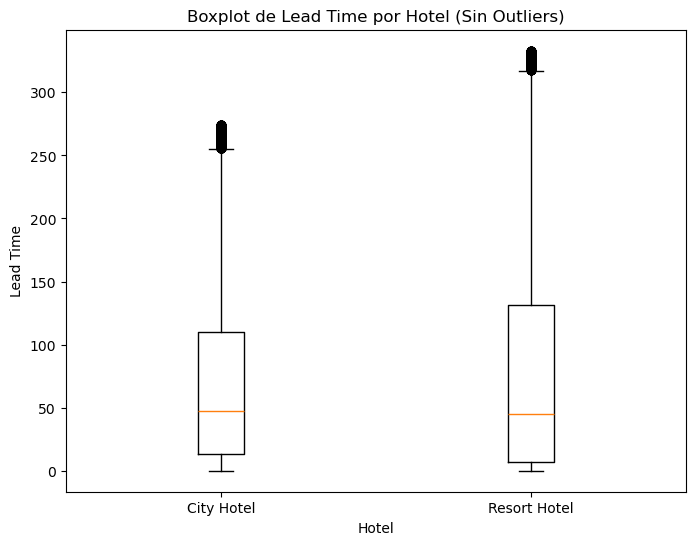

In [21]:
# Calcular el rango intercuartílico (IQR) para cada hotel
def remove_outliers(group):
    Q1 = group['lead_time'].quantile(0.25)
    Q3 = group['lead_time'].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Filtrar los valores que están dentro de los límites calculados
    return group[(group['lead_time'] >= lower_bound) & (group['lead_time'] <= upper_bound)]

# Aplicar la función para cada hotel y crear un nuevo DataFrame sin outliers
df_no_outliers = df.groupby('hotel').apply(remove_outliers).reset_index(drop=True)

# Agrupar nuevamente sin outliers para crear el boxplot
grouped_hotel_no_outliers = df_no_outliers.groupby('hotel')['lead_time'].apply(list).reset_index()

# Crear el boxplot sin outliers
plt.figure(figsize=(8,6))
plt.boxplot(grouped_hotel_no_outliers['lead_time'], labels=grouped_hotel_no_outliers['hotel'])
plt.title('Boxplot de Lead Time por Hotel (Sin Outliers)')
plt.xlabel('Hotel')
plt.ylabel('Lead Time')
plt.show()


### Subplots para ver dias, semanas, meses y años mas transcurridos

Creamos varios histogramas para representar la frecuencia en los dias, semanas, meses y años y lo agrupamos en un subplots 2x2

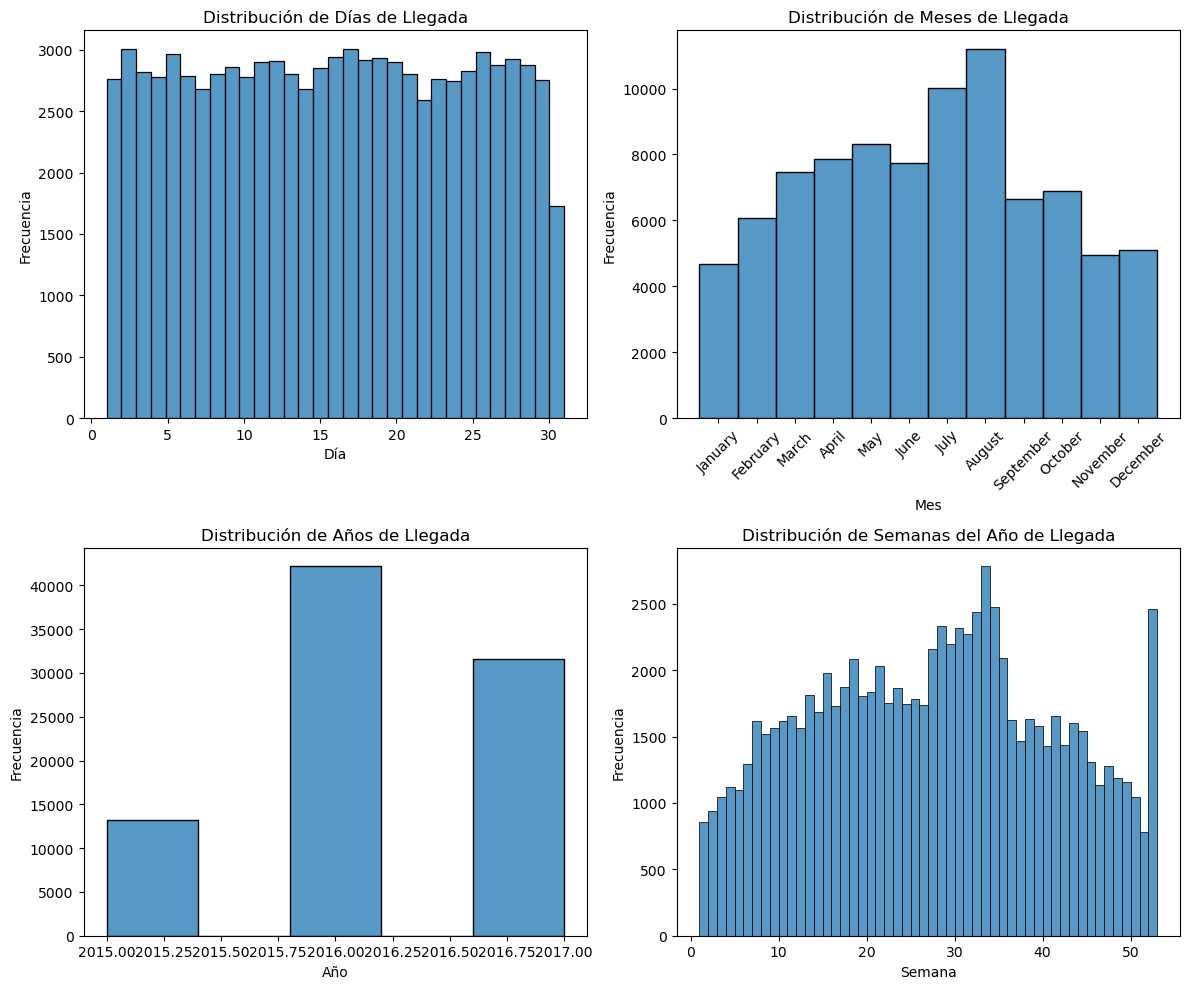

In [22]:
# Crear un grid de 2x2 subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Primer gráfico: Distribución de Días de Llegada
sns.histplot(df['arrival_date_day_of_month'], bins=31, kde=False, ax=axs[0, 0])
axs[0, 0].set_title('Distribución de Días de Llegada')
axs[0, 0].set_xlabel('Día')
axs[0, 0].set_ylabel('Frecuencia')

# Segundo gráfico: Distribución de Meses de Llegada
sns.histplot(df['arrival_date_month'], kde=False, ax=axs[0, 1])
axs[0, 1].set_title('Distribución de Meses de Llegada')
axs[0, 1].set_xlabel('Mes')
axs[0, 1].set_ylabel('Frecuencia')
axs[0, 1].tick_params(axis='x', rotation=45)  # Rotar etiquetas si es necesario

# Tercer gráfico: Distribución de Años de Llegada
sns.histplot(df['arrival_date_year'], bins=5, kde=False, ax=axs[1, 0])
axs[1, 0].set_title('Distribución de Años de Llegada')
axs[1, 0].set_xlabel('Año')
axs[1, 0].set_ylabel('Frecuencia')

# Cuarto gráfico: Distribución de Semanas del Año de Llegada
sns.histplot(df['arrival_date_week_number'], bins=52, kde=False, ax=axs[1, 1])
axs[1, 1].set_title('Distribución de Semanas del Año de Llegada')
axs[1, 1].set_xlabel('Semana')
axs[1, 1].set_ylabel('Frecuencia')

plt.tight_layout()
plt.show()


Los resultados anteriores indican que las personas tuvieron mayor preferencia para alojarse en el hotel entre los meses Julio y Agosto 

### Correlacion entre las variables luego de limpiar datos

<Axes: >

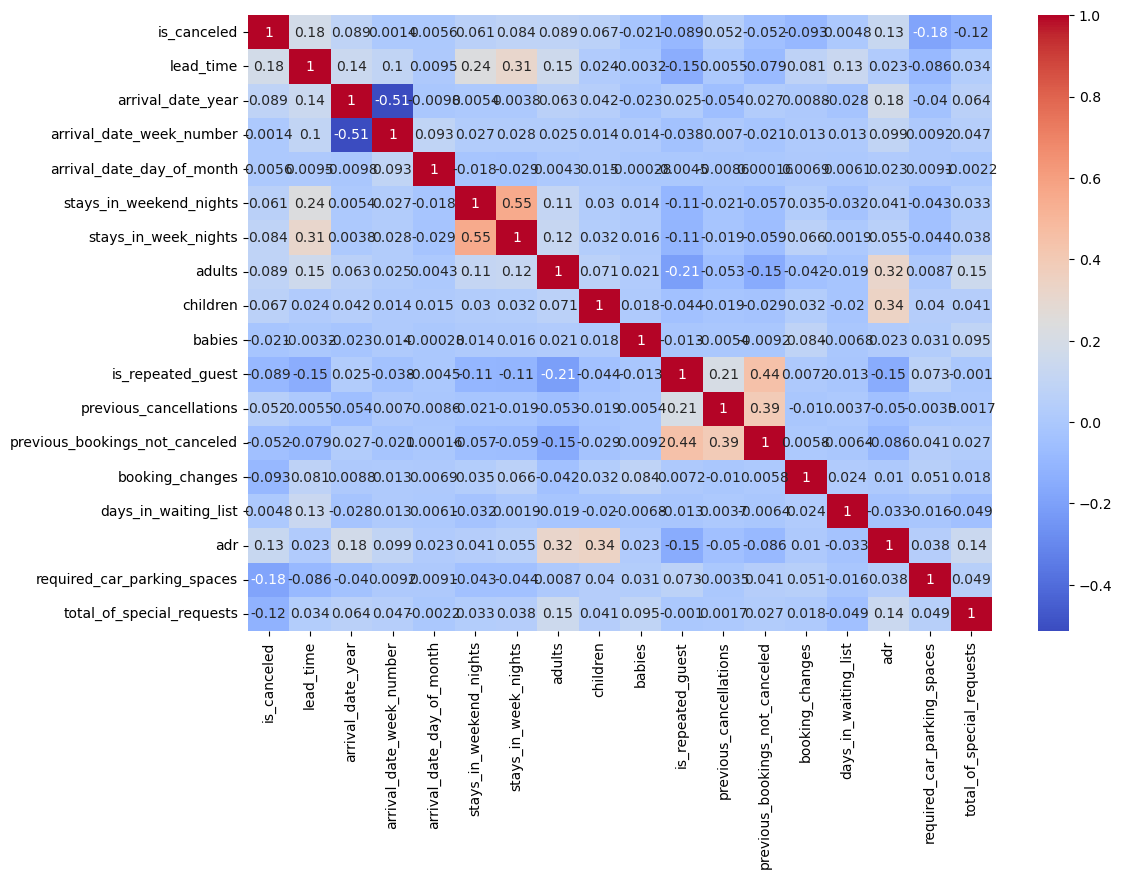

In [23]:
df_numerics = df.select_dtypes(include=[float, int]) #seleccionamos las columnas numericas para la correlacion

plt.figure(figsize=(12,8))
sns.heatmap(df_numerics.corr(), annot=True, cmap='coolwarm')


### Ratio de Cancelacion

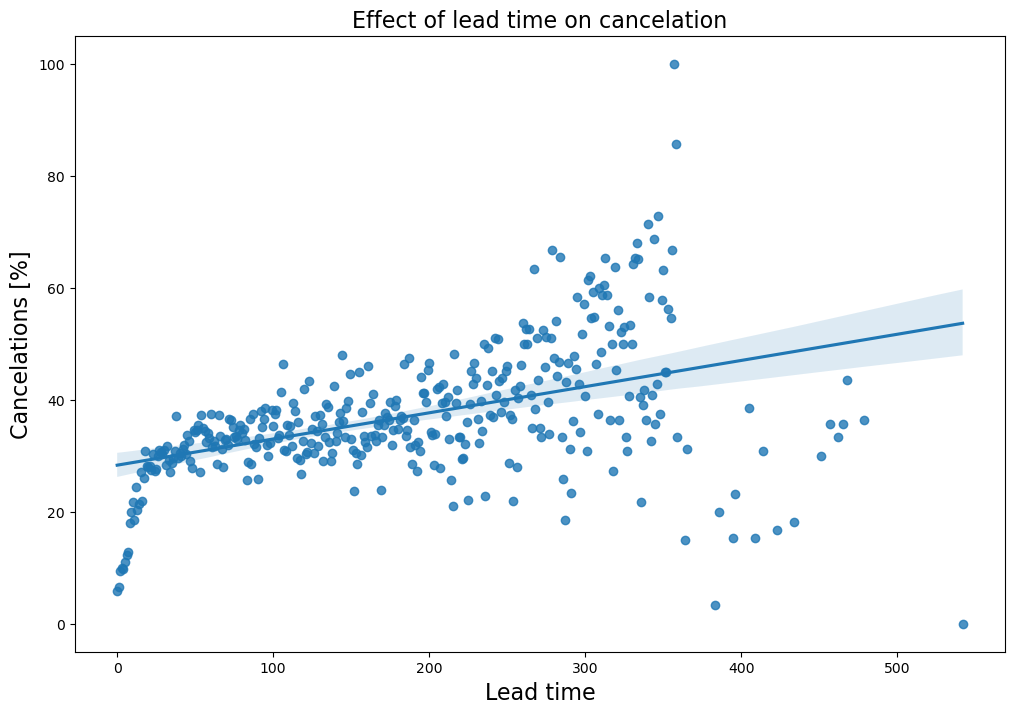

In [24]:
# ratio de cancelacion, codigo ajustado y copiado de https://www.kaggle.com/code/marcuswingen/eda-of-bookings-and-ml-to-predict-cancelations

df_grouped3 = df.groupby("lead_time")["is_canceled"].describe()
lead_cancel_data_10 = df_grouped3.loc[df_grouped3["count"] >= 10]

plt.figure(figsize=(12, 8))
sns.regplot(x=lead_cancel_data_10.index, y=lead_cancel_data_10["mean"].values * 100)
plt.title("Effect of lead time on cancelation", fontsize=16)
plt.xlabel("Lead time", fontsize=16)
plt.ylabel("Cancelations [%]", fontsize=16)
plt.show()

Se aprecia una pequeña correlacion entre el limite de espera de entrega y las cancelaciones, podria ser que la gente se cansa de esperar

### Estadisticas Varias

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 86971 entries, 0 to 119389
Data columns (total 30 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   hotel                           86971 non-null  object        
 1   is_canceled                     86971 non-null  int64         
 2   lead_time                       86971 non-null  int64         
 3   arrival_date_year               86971 non-null  int64         
 4   arrival_date_month              86971 non-null  category      
 5   arrival_date_week_number        86971 non-null  int64         
 6   arrival_date_day_of_month       86971 non-null  int64         
 7   stays_in_weekend_nights         86971 non-null  int64         
 8   stays_in_week_nights            86971 non-null  int64         
 9   adults                          86971 non-null  int64         
 10  children                        86967 non-null  float64       
 11  babies

In [26]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
count,86971.000000,86971.000000,86971.000000,86971.000000,86971.000000,86971.000000,86971.000000,86971.000000,86967.000000,86971.000000,86971.000000,86971.000000,86971.000000,86971.000000,86971.000000,86971.000000,86971.000000,86971.000000,86971
mean,0.274919,79.830012,2016.210587,26.833266,15.814398,1.004691,2.624001,1.880052,0.134200,0.010820,0.038668,0.030470,0.184590,0.268342,0.748514,106.605616,0.084534,0.698313,2016-08-31 06:34:55.401915392
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000,2014-10-17 00:00:00
25%,0.000000,11.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,72.250000,0.000000,0.000000,2016-03-18 00:00:00
50%,0.000000,49.000000,2016.000000,27.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,98.390000,0.000000,0.000000,2016-09-08 00:00:00
75%,1.000000,125.000000,2017.000000,37.000000,23.000000,2.000000,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,134.100000,0.000000,1.000000,2017-03-06 00:00:00
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,5.000000,10.000000,10.000000,1.000000,26.000000,72.000000,18.000000,391.000000,5400.000000,8.000000,5.000000,2017-09-14 00:00:00
std,0.446476,85.954631,0.686238,13.665870,8.835849,1.027774,2.041102,0.496448,0.446745,0.113624,0.192804,0.369861,1.735581,0.710436,10.015798,54.904644,0.282006,0.831762,NaN
